<a href="https://colab.research.google.com/github/abhijeetanand9875/AirBnb_Bookings_Analysis-EDA-Abhijeet/blob/main/Abhijeet_EDA_AirBnb_Bookings_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questions for Analysis:**


1.   Finding prices of different locations with their corresponding room_type
2.  Visualizing top 20 hosts and finding the reason behind it.
3.  What can we learn from predictions? (ex: locations, prices, reviews, etc)
4. Which hosts are the busiest and why?
5. Is there any noticeable difference of traffic among different areas and what could be the reason for it?



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries**

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


#**Load DataSett**

In [3]:
#load and read the data set
path ="/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv"
airbnb_data = pd.read_csv(path)

In [4]:
#print the dataset
airbnb_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
#Top 5 row dataset
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Transpose data views
airbnb_data.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [7]:
#information of dataset
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#Datatype of dataset
airbnb_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
#count the duplicate data in dataset
len(airbnb_data[airbnb_data.duplicated()])

0

In [10]:
#Null value count
print(airbnb_data.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


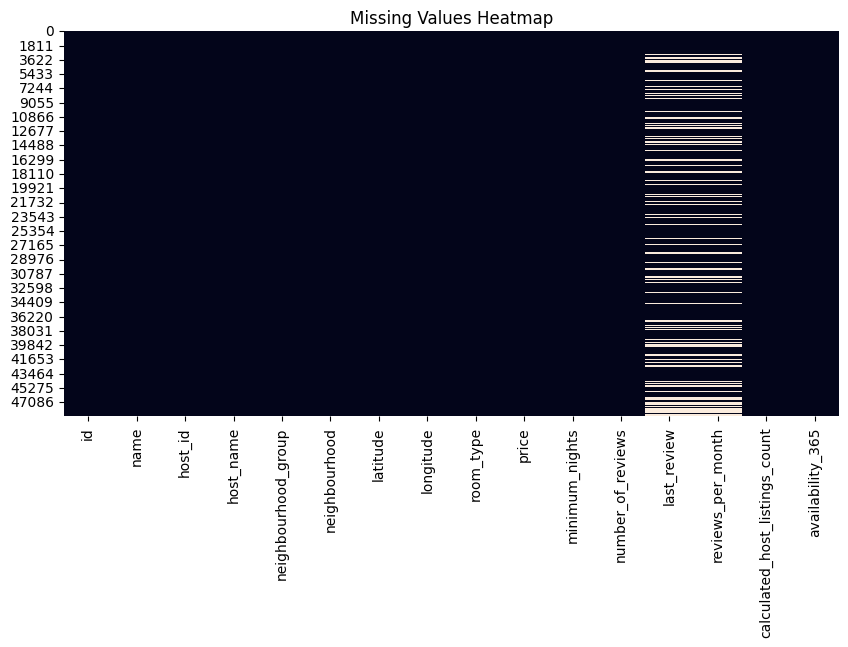

In [11]:
# Visualizing the missing values through heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(airbnb_data.isnull(), cbar=False, cmap="rocket")
plt.title('Missing Values Heatmap')
plt.show()

In [12]:
#filling NULL value in 4 column with respective values
airbnb_data.fillna({"name":"NAN"}, inplace=True)
airbnb_data.fillna({"host_name":"NAN"}, inplace=True)
airbnb_data.fillna({"last_review":"NAN"}, inplace=True)
airbnb_data.fillna({"reviews_per_month":0}, inplace=True)

In [13]:
#checking Null values (after replacing Null value to respective values)
print(airbnb_data.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


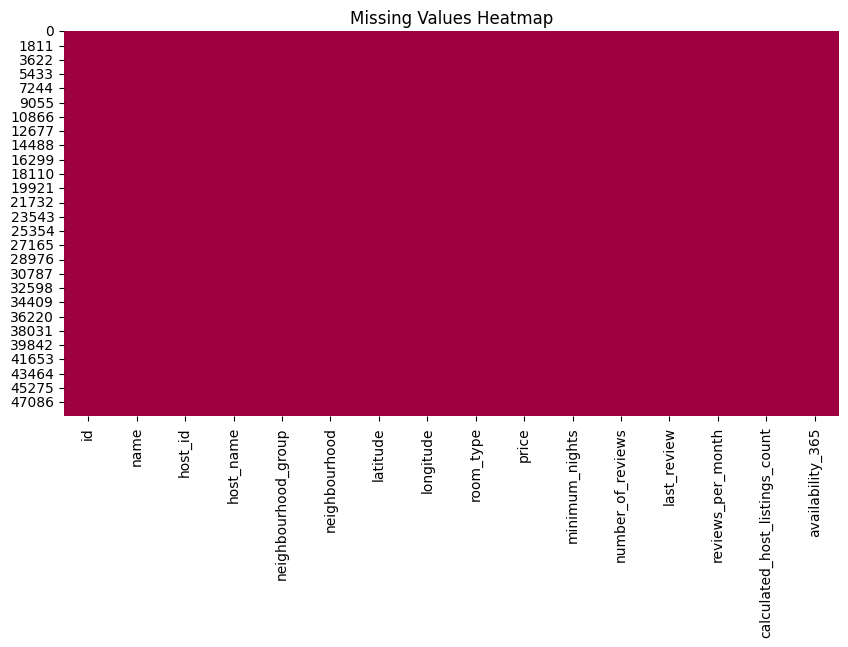

In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(airbnb_data.isnull(), cbar=False, cmap='Spectral')
plt.title('Missing Values Heatmap')
plt.show()

In [15]:
ind = airbnb_data.columns
print(ind)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [16]:
airbnb_data.describe(include='all')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895,4.889500e+04,48895,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000
unique,NaN,47906,NaN,11453,5,221,NaN,NaN,3,NaN,NaN,NaN,1765,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NAN,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,10052,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.090910,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.597283,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.040000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.370000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,1.580000,2.000000,227.000000


In [17]:
for i in airbnb_data.columns.tolist():
  print("no. of unique value in",i,"is",airbnb_data[i].nunique())

no. of unique value in id is 48895
no. of unique value in name is 47906
no. of unique value in host_id is 37457
no. of unique value in host_name is 11453
no. of unique value in neighbourhood_group is 5
no. of unique value in neighbourhood is 221
no. of unique value in latitude is 19048
no. of unique value in longitude is 14718
no. of unique value in room_type is 3
no. of unique value in price is 674
no. of unique value in minimum_nights is 109
no. of unique value in number_of_reviews is 394
no. of unique value in last_review is 1765
no. of unique value in reviews_per_month is 938
no. of unique value in calculated_host_listings_count is 47
no. of unique value in availability_365 is 366


In [18]:
df= airbnb_data.copy()

In [19]:
# Finding number of customers
customers_df = df[df['host_id'] != df['id']]
customer_count = len(customers_df)

print("Number of customers on Airbnb: - ", customer_count)

Number of customers on Airbnb: -  48895


# **Finding prices of different locations with their corresponding room_type**
Analysing Different locations according to their room_type and corresponding median prices

In [20]:

#extracting a df from airdnd_df
price_df = airbnb_data[['neighbourhood_group','room_type','price']]
#grouping this data frame according to their neighbourhood_group and room_type and assigning median prices
median_price_df =price_df.groupby(['neighbourhood_group','room_type']).median().reset_index()

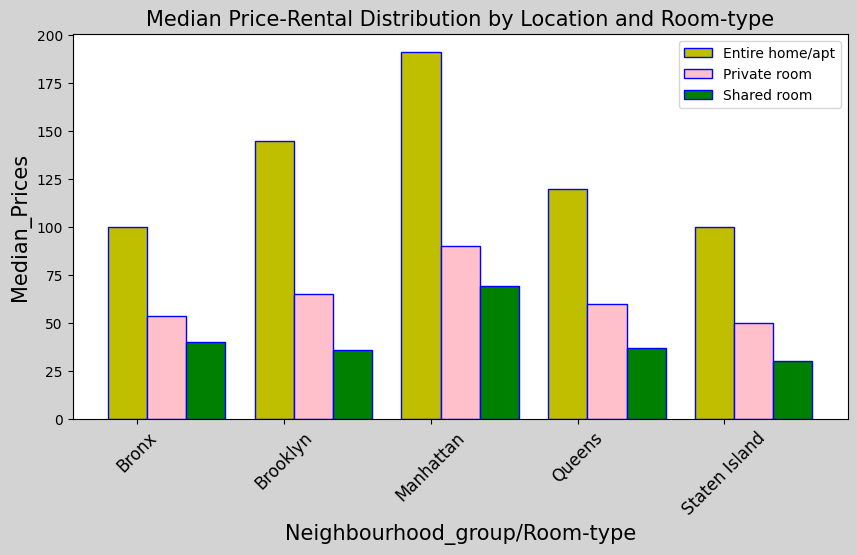

In [21]:
#getting the unique locations
locations = median_price_df.neighbourhood_group.unique()
x_rooms1 = [0.8, 3.8, 6.8, 9.8, 12.8]
x_rooms2 = [1.6, 4.6, 7.6, 10.6, 13.6]
x_rooms3 = [2.4, 5.4, 8.4, 11.4, 14.4]
y_values1 = median_price_df[median_price_df['room_type'] == 'Entire home/apt']['price'].values
y_values2 = median_price_df[median_price_df['room_type'] == 'Private room']['price'].values
y_values3 = median_price_df[median_price_df['room_type'] == 'Shared room']['price'].values
fig,ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('lightgray')
plt.bar(x_rooms1, y_values1, color='y', edgecolor='b')
plt.bar(x_rooms2, y_values2, color='pink', edgecolor='b')
plt.bar(x_rooms3, y_values3, color='g', edgecolor='b')
ax.set_xticks(range(1,16,3))
ax.set_xticklabels(locations, fontsize='12')
for tick in ax.get_xticklabels():
  tick.set_rotation(45)
plt.xlabel('Neighbourhood_group/Room-type',fontsize='15')
plt.ylabel('Median_Prices', fontsize='15')
plt.legend(labels=median_price_df.room_type.unique(), loc='best')
plt.title('Median Price-Rental Distribution by Location and Room-type',fontsize='15')
plt.show()

**Conclusion**

Entire-home/apt of every location have higher prices followed by private-rooms and shared-rooms.

Manhattan is most demanded location followed by Brooklyn.

Manhattan is the costliest location for every room type may be due to their location or high demand followed by Brooklyn .

The price for private-room rentals of Manhattan is somewhat in the same range
of entire-home/apt rentals of other locations.

## ***Visualizing top 20 hosts and finding the reason behind it.***

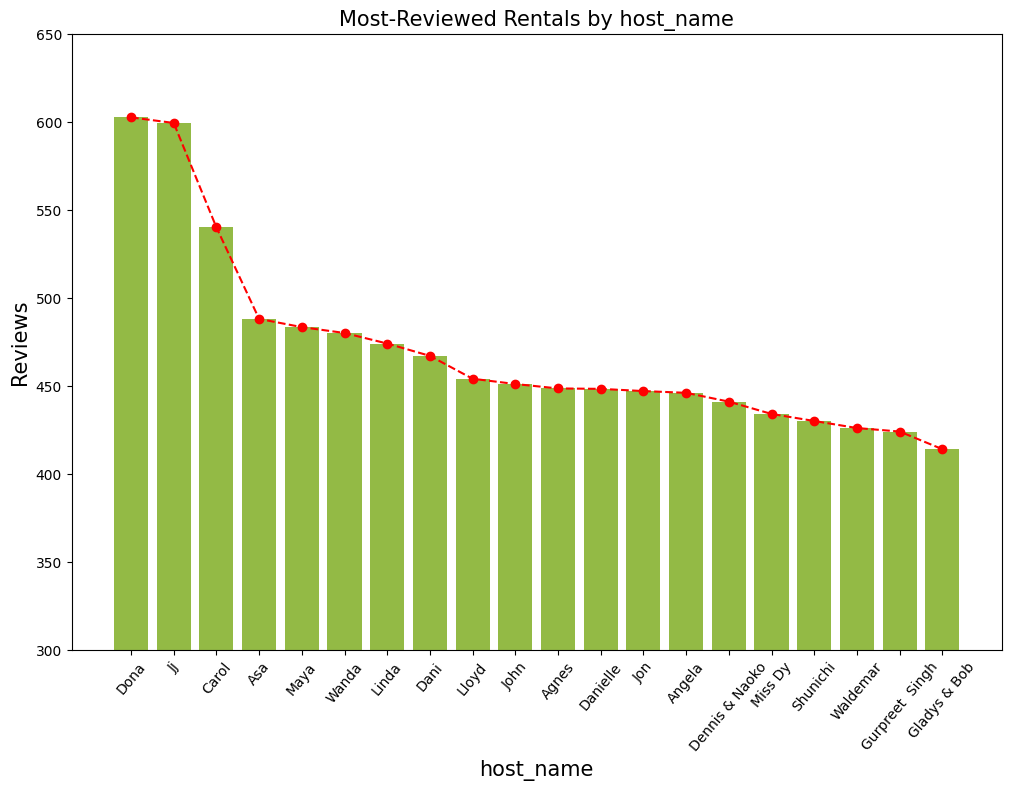

In [24]:

most_review_host_df = airbnb_data.sort_values('number_of_reviews',ascending=False)
top_reviewed_host_df = most_review_host_df.loc[:,['host_name','number_of_reviews']][:30]
top_reviewed_host_df = top_reviewed_host_df.groupby('host_name').mean().sort_values('number_of_reviews',ascending=False).reset_index()
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=top_reviewed_host_df['host_name'],y=top_reviewed_host_df['number_of_reviews'].values,color='yellowgreen',ax=ax)
plt.plot(top_reviewed_host_df['number_of_reviews'], marker='o', color='red',linestyle='--')
plt.ylabel('Reviews', fontsize='15')
plt.xlabel('host_name',fontsize='15')
plt.ylim((300,650))
for ax in ax.get_xticklabels():
  ax.set_rotation(50)
plt.title('Most-Reviewed Rentals by host_name',fontsize='15')
plt.show()

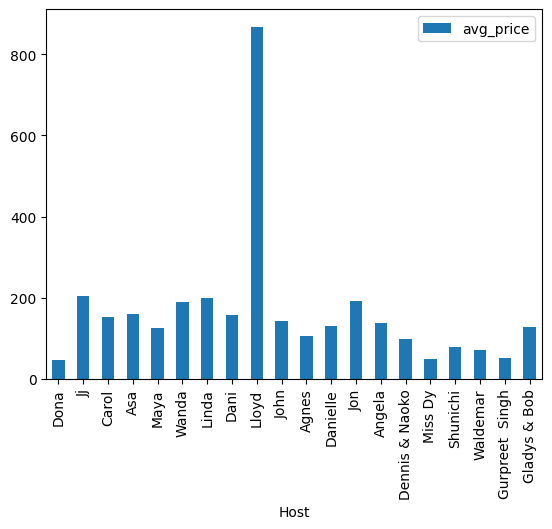

In [27]:
top_host=top_reviewed_host_df['host_name'].tolist()
top_host_dict={}
for elem in top_host:
  avg_price=airbnb_data[airbnb_data['host_name']==elem].price.mean()
  top_host_dict[elem]=avg_price

top_host_avg_price_df=pd.DataFrame(top_host_dict.items(), columns=['Host', 'avg_price'])
top_host_avg_price_df.set_index('Host', inplace=True)
# top_host_avg_price_df

top_host_avg_price_df.plot(kind='bar')

plt.show()

**Conclusion**

Almost every popular host have rental listings in the price range between 50 and 200.

# **What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [28]:
# Which neighbourhood has max reviews ?
# eg . manhattan 8900
# eg . Brook 4000


area_reviews=airbnb_data.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews',ascending= False)
area_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


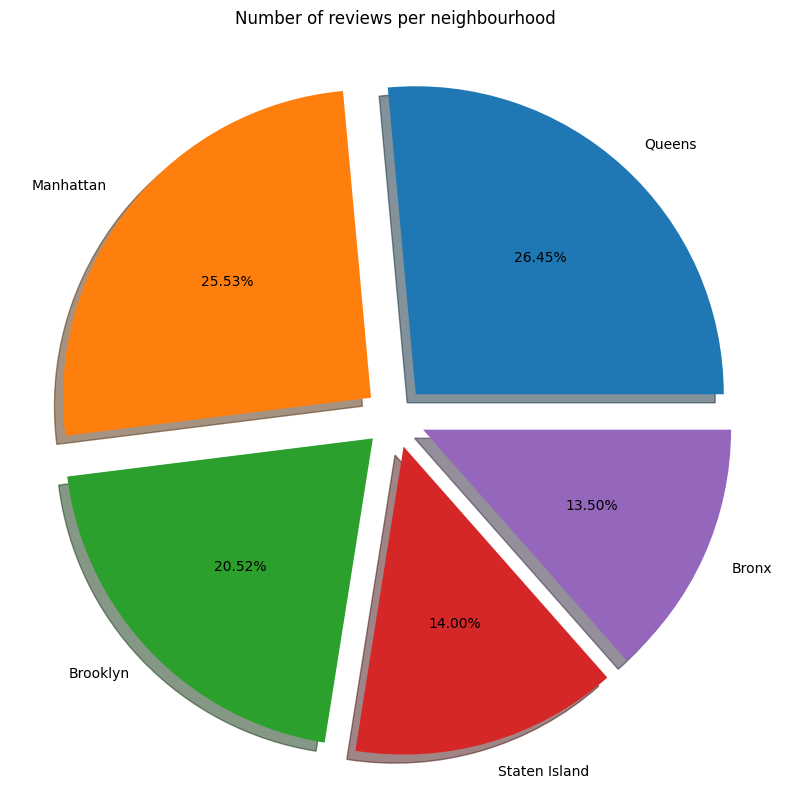

In [29]:
# Visualize number of reviews vs neighbourhood
plt.rcParams['figure.figsize']=(20,10)
reviews=area_reviews['number_of_reviews']
plt.pie(reviews,labels=area_reviews['neighbourhood_group'],autopct='%0.2f%%',explode=[0.1,0.1,0.1,0.1,0.1],shadow=True)
plt.title('Number of reviews per neighbourhood')
plt.show()

In [30]:
# price vs reviews - 0$ (price inconsistency)
price=airbnb_data.groupby(['price'])['number_of_reviews'].max().reset_index()
price.head(10)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9
5,15,19
6,16,43
7,18,1
8,19,76
9,20,116


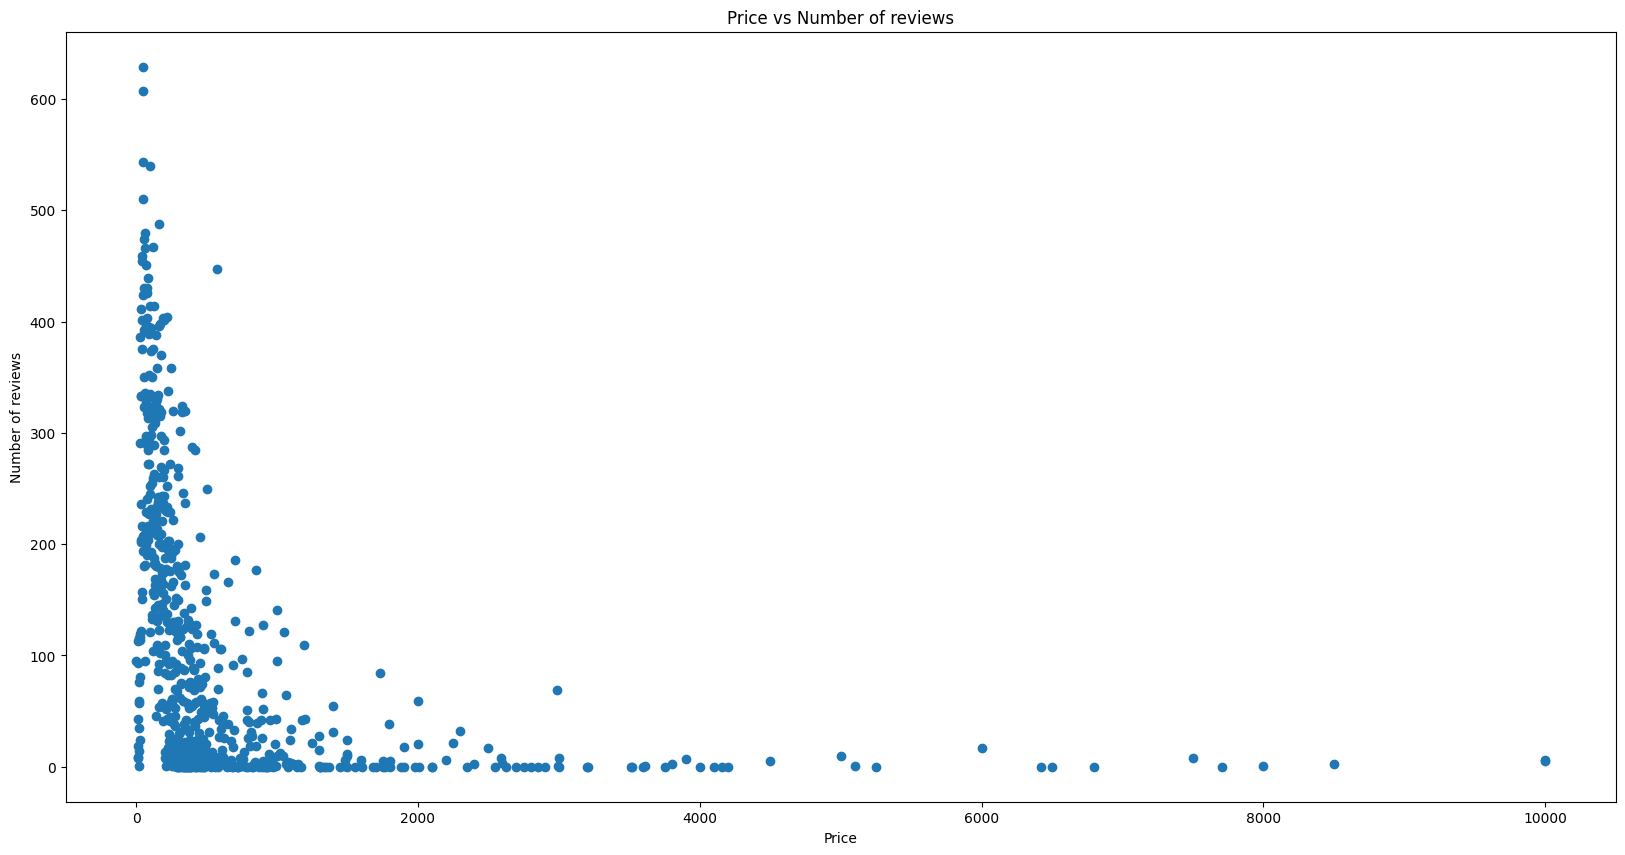

In [31]:
area=price['price']
price=price['number_of_reviews']
fig=plt.figure(figsize=(20,10))
plt.scatter(area,price)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Price vs Number of reviews')
plt.show()

In [32]:
airbnb_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NAN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Which hosts are the busiest and why?**

In [33]:
# Which host are the busiest and why
# Busy host are those who have max number of reviews.
# Hostname airbnb,room - reviews

busy_host = airbnb_data.groupby(['host_id','host_name','neighbourhood_group','room_type'])['number_of_reviews'].max().reset_index()
busy_host=busy_host.sort_values(by='number_of_reviews', ascending=False).head(10)
busy_host

,host_id,host_name,neighbourhood_group,room_type,number_of_reviews
24546,47621202,Dona,Queens,Private room,629
7721,4734398,Jj,Manhattan,Private room,607
22268,37312959,Maya,Queens,Private room,543
4602,2369681,Carol,Manhattan,Private room,540
19494,26432133,Danielle,Queens,Private room,510
13741,12949460,Asa,Brooklyn,Entire home/apt,488
1978,792159,Wanda,Brooklyn,Private room,480
5068,2680820,Linda,Queens,Private room,474
161,42273,Dani,Brooklyn,Entire home/apt,467
18335,23591164,Angela,Queens,Private room,466


**Busiest Host are:**

Dona

Jj

Maya

Carol

Private Rooms are most preferred.

# **Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [34]:
traffic=airbnb_data.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index().sort_values(by='minimum_nights',ascending=False)
traffic
#13199/100=131 days


,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


In [36]:
airbnb_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NAN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


From above analysis people are prefering entire home.apt over private rooms in manhattan followed by others.

People prefering entire home/apt stay a bit longer than people who take private rooms

If no. of reviews are more for particular neighbourhood that means it is a famous place

If people are not staying for more then 1 night that means they are travellers---they give reviews

In [37]:
airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000
